In [3]:
''' Imported packages for python ''' 
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import pylab as plt
import itertools
import warnings
import time


''' Imported packages from scikit-learn '''
from skbio.stats import composition
from sklearn.decomposition import PCA
#from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split 
#from sklearn.ensemble import IsolationForest
#from sklearn.covariance import EllipticEnvelope
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
#from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
#from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

from natsort import natsorted, ns
from os import listdir
from IPython.display import display, HTML

#from scipy.stats.mstats import chisquare
#from scipy.stats import ks_2samp

In [4]:
## Functions: 
''' Remove first and last row of dataframe '''
def remove_first_last(df): 
    return df[1:df.shape[0]-1]

def plot_dissimilarity_matrix(D_matrix,title_string): 
    mask = np.zeros_like(D_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = False
    f, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    cax = sns.heatmap(D_matrix, mask=mask, cmap=cmap, vmin=D_matrix.min(), vmax=D_matrix.max(), square=True, annot=False, xticklabels=True, yticklabels=True, linewidths=0, cbar_kws={"shrink": .5}, ax=ax, cbar=True, annot_kws={"size": 14})     
    ax.tick_params(labelsize=11)
    ax.set_title(title_string, size=22)
    f.tight_layout()
    plt.show()
    
def plot_dissimilarity_time(D_matrix, n_rows, title_string): 
    f, ax = plt.subplots(figsize=(12, 12))
    ax.errorbar(np.arange(1,D_matrix.shape[0]+1),D_matrix[0:n_rows,:].mean(axis=0),yerr=D_matrix[0:n_rows,:].std(axis=0), c='r', marker='o', linestyle='--')
    ax.tick_params(labelsize=11)
    ax.set_xlabel('Time', size=18)
    ax.set_ylabel('Average dissimilarity', size=18)
    ax.set_title(title_string, size=22)
    f.tight_layout()
    plt.show()

In [5]:
plt.style.use('ggplot') #Plotting style for matplotlib
warnings.simplefilter(action = "ignore", category = FutureWarning) #Do not display futurewarnings
start_time = time.time() #Start stopwatch to determine runtime

##############################################################################

''' Put species names in an excel sheet to later on annotate in silico communities '''
path_clean = '60s/Stability/'
path_cont_bact = '60s/Bact/'
path_cont_water = '60s/Mixed/'
datalist_cleansamples = natsorted(listdir(path_clean), alg=ns.IGNORECASE) 
datalist_contsamples_bact = natsorted(listdir(path_cont_bact), alg=ns.IGNORECASE)  
datalist_contsamples_water = natsorted(listdir(path_cont_water), alg=ns.IGNORECASE)  
idxclean0 = pd.read_csv('60s/stab1_names_60.txt', index_col=None, header=None)
idxclean1 = pd.read_csv('60s/stab2_names_60.txt', index_col=None, header=None)
idxclean2 = pd.read_csv('60s/stab3_names_60.txt', index_col=None, header=None)

dfclean_0 = pd.read_csv(path_clean + datalist_cleansamples[3], sep = " ", index_col=0, header=None)
dfclean_1 = pd.read_csv(path_clean + datalist_cleansamples[8], sep = " ", index_col=0,header=None)
dfclean_2 = pd.read_csv(path_clean + datalist_cleansamples[13], sep = " ", index_col=0, header=None)
dfclean_0 = dfclean_0.transpose()
dfclean_1 = dfclean_1.transpose()
dfclean_2 = dfclean_2.transpose()
dfclean_0.index = idxclean0
dfclean_1.index = idxclean1
dfclean_2.index = idxclean2

idxbact = pd.read_csv('60s/bact_names_60.txt', index_col=None, header=None)
idxwater = pd.read_csv('60s/mixed_names_60.txt', index_col=None, header=None)

dfbact = pd.read_csv(path_cont_bact + datalist_contsamples_bact[3], sep = " ", index_col = 0, header=0)
dfwater = pd.read_csv(path_cont_water + datalist_contsamples_water[3], sep = " ", index_col = 0, header=0)
dfbact = dfbact.transpose()
dfwater = dfwater.transpose()
dfbact.index = idxbact
dfwater.index = idxwater

In [6]:
dfclean_0 = remove_first_last(dfclean_0)
dfclean_1 = remove_first_last(dfclean_1)
dfclean_2 = remove_first_last(dfclean_2)
dfclean = pd.concat([dfclean_0, dfclean_1, dfclean_2], axis = 0, ignore_index = False)
dfbact = remove_first_last(dfbact)
dfwater = remove_first_last(dfwater)

In [7]:
D_clean = pairwise_distances(dfclean, metric='braycurtis')
D_bact = pairwise_distances(dfbact, metric='braycurtis')
D_water = pairwise_distances(dfwater, metric='braycurtis')
D_bact_water = pairwise_distances(dfbact,dfwater, metric='braycurtis')
''' Clean water fingerprints have contain one columns less than bact or water fingerprints! '''

' Clean water fingerprints have contain one columns less than bact or water fingerprints! '

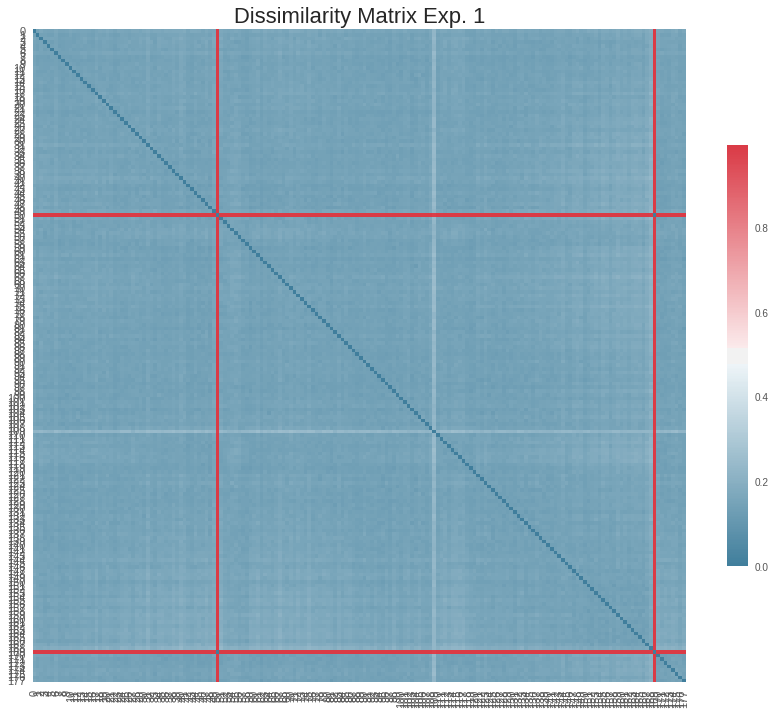

In [8]:
plot_dissimilarity_matrix(D_clean, 'Dissimilarity Matrix Exp. 1')

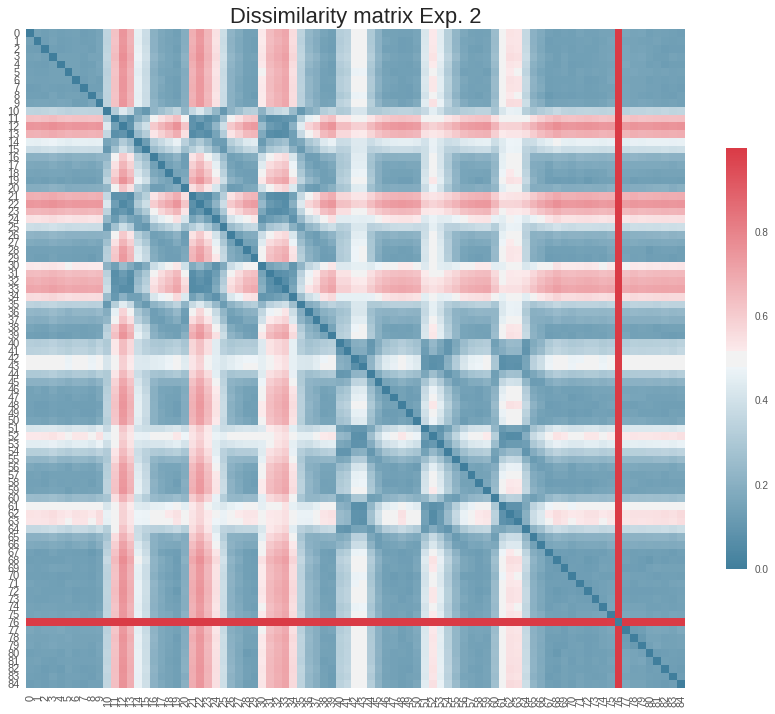

In [9]:
plot_dissimilarity_matrix(D_bact, 'Dissimilarity matrix Exp. 2')

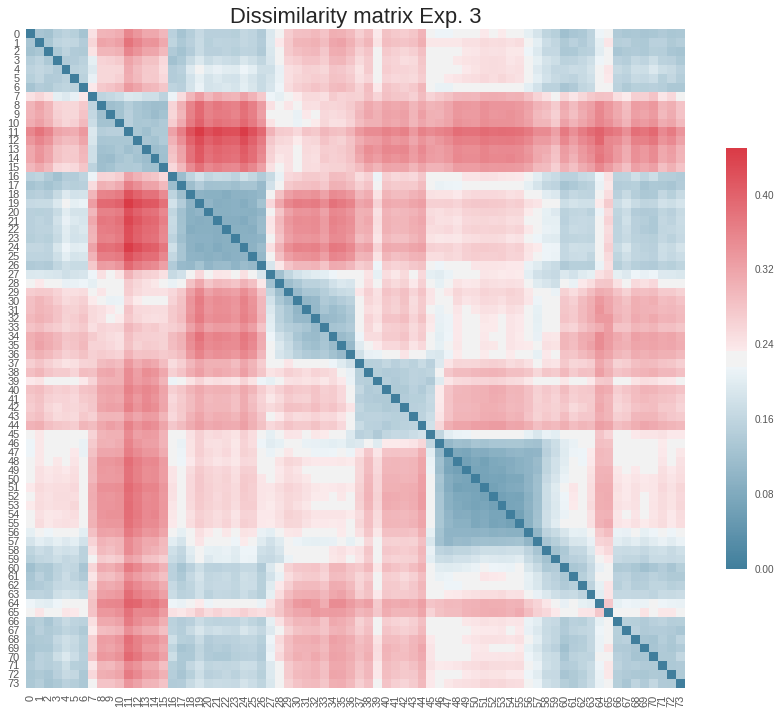

In [10]:
plot_dissimilarity_matrix(D_water, 'Dissimilarity matrix Exp. 3')

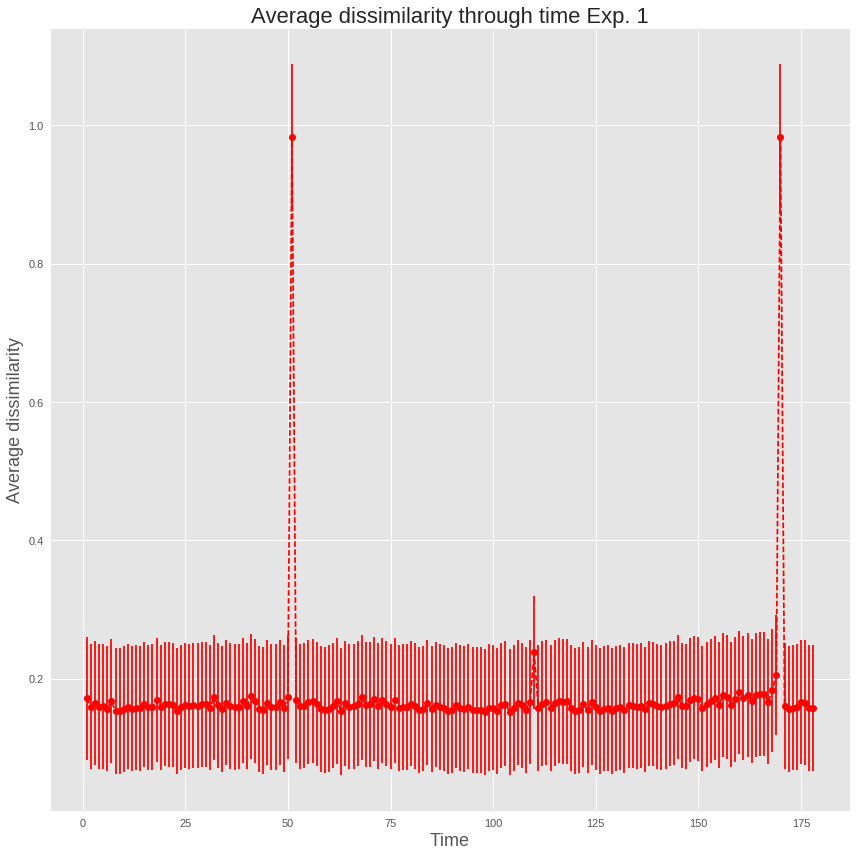

In [11]:
plot_dissimilarity_time(D_clean,D_clean.shape[0],'Average dissimilarity through time Exp. 1')

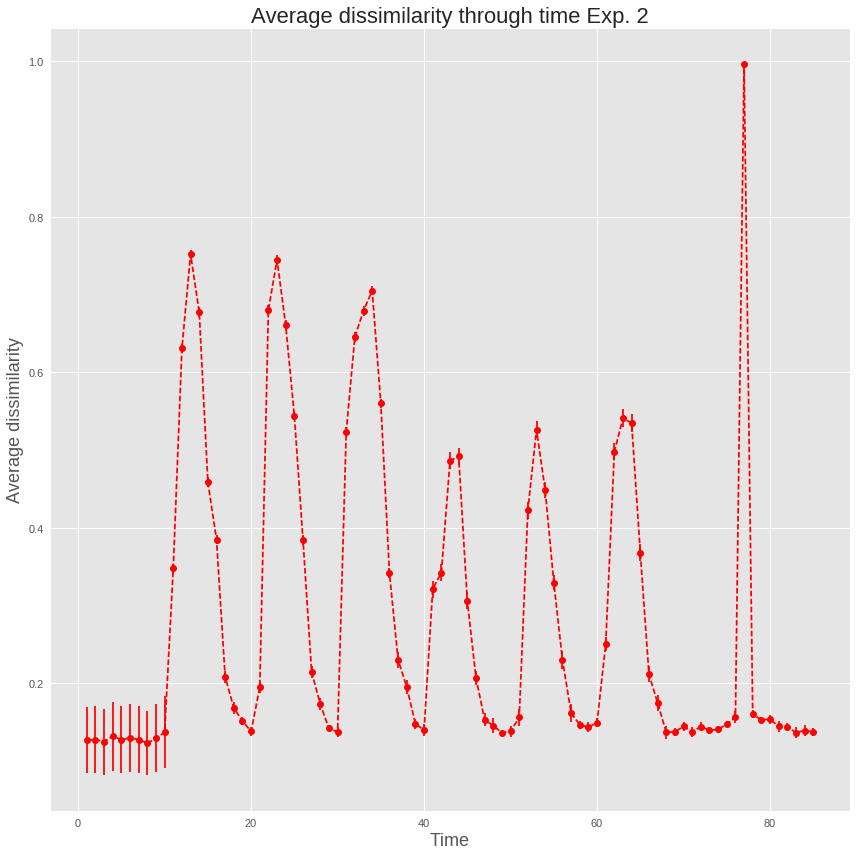

In [12]:
plot_dissimilarity_time(D_bact,10,'Average dissimilarity through time Exp. 2')

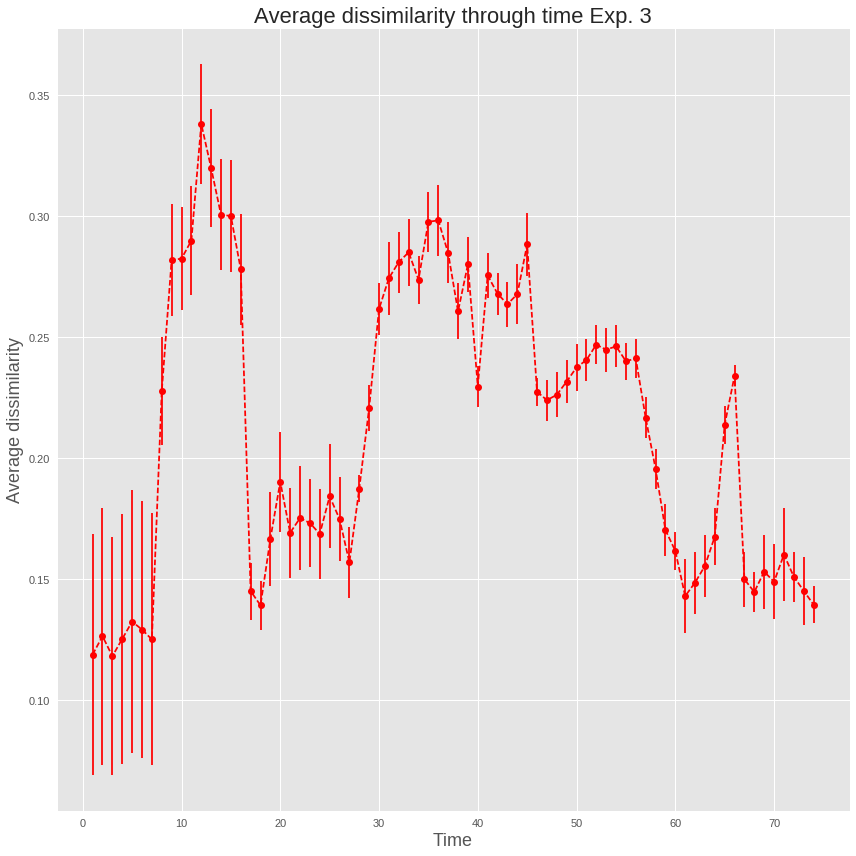

In [13]:
plot_dissimilarity_time(D_water,7,'Average dissimilarity through time Exp. 3')

In [19]:
''' Log-Ratio analyses '''
min_bact = dfbact.min()[dfbact.min() > 0]
min_bact = min_bact.min()
dfbact.replace(0,min_bact,inplace=True)
clr_norm = composition.clr(dfbact)
#ilr_norm = composition.ilr(dfbact)

In [21]:
D_bact = pairwise_distances(clr_norm, metric='euclidean')

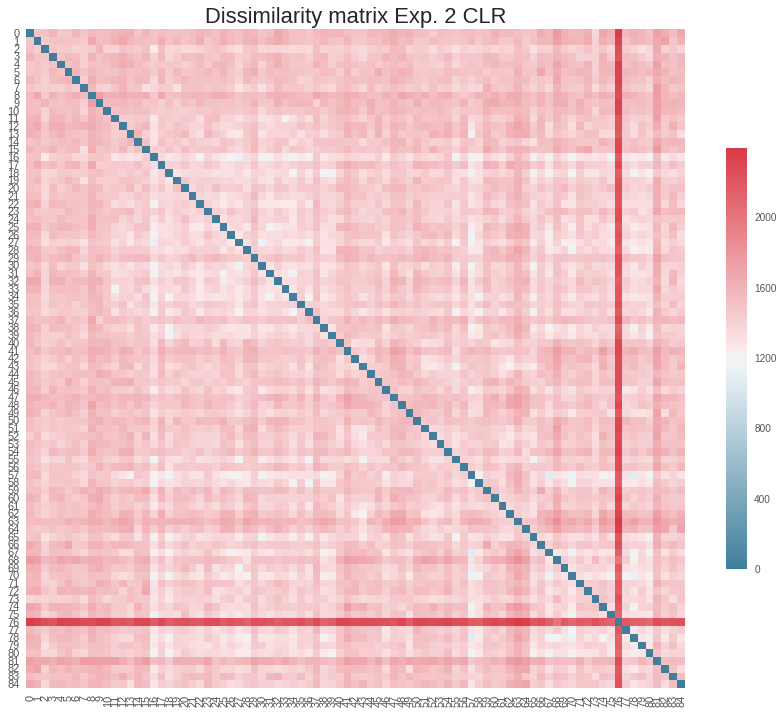

In [22]:
plot_dissimilarity_matrix(D_bact, 'Dissimilarity matrix Exp. 2 CLR')